## EDA mit Umsätze- und Filialen-Daten

In diesem Notizbuch kombinieren wir Verkaufsdaten mit filialspezifischen Daten und führen explorative Analysen durch.

##### Importieren der notwendigen Bibliotheken:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Lesen der Verkaufsdaten

In [2]:
# we only need datapoints for open stores 
sales_df = pd.read_csv("../data/sales_open.csv")
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


##### Verknüpfung mit den Daten der Filialen:

In [3]:
stores_df = pd.read_csv("../data/stores_clean.csv")
sales_stores_df = pd.merge(sales_df, stores_df, how = 'inner', on = 'Store')
# Save this data to csv file for later use
sales_stores_df.to_csv("../data/sales_stores.csv", index=False)
sales_stores_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2,Promo2Since,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,COBetween2005-11-16_2010-03-01,0,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,COBetween2005-11-16_2010-03-01,1,P2Before2011-04-04,P2Jan
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,COBetween2005-11-16_2010-03-01,1,P2Before2011-04-04,P2Jan
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,COBetween2005-11-16_2010-03-01,0,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,COAfter2010-03-01,0,NaN,NaN


##### EDA mit den Daten der Filialen:

##### StoreType

In [4]:
by_store_type= sales_stores_df.groupby('StoreType')
by_store_type[['Customers', 'Sales']].describe().transpose()

StoreType                    a             b              c              d
Customers count  457077.000000  15563.000000  112978.000000  258774.000000
          mean      795.361469   2021.822335     815.465887     606.339876
          std       387.564196    911.031277     329.744701     199.266174
          min         0.000000      0.000000       0.000000       0.000000
          25%       547.000000   1255.000000     583.000000     464.000000
          50%       720.000000   1839.000000     756.000000     577.000000
          75%       949.000000   2750.500000     981.000000     716.000000
          max      7388.000000   5494.000000    3096.000000    2239.000000
Sales     count  457077.000000  15563.000000  112978.000000  258774.000000
          mean     6925.167661  10231.407505    6932.512755    6822.141881
          std      3277.786381   5157.190155    2897.564578    2556.582881
          min         0.000000      0.000000       0.000000       0.000000
          25%      4695.000000   6344.000000    4915.000000    5050.000000
          50%      6285.000000   9130.000000    6407.000000    6395.000000
          75%      8406.000000  13183.500000    8349.000000    8123.000000
          max     41551.000000  38722.000000   31448.000000   38037.000000

Filialen der Art `b` haben im Durchschnitt einen größeren Kundenstrom und erzielen höhere Gewinne. Es gibt aber weniger Filialen dieser Art.

##### Assortment

In [5]:
by_assortment = sales_stores_df.groupby('Assortment')
by_assortment[['Customers', 'Sales']].describe().transpose()

Assortment                   a             b              c
Customers count  444909.000000   8212.000000  391271.000000
          mean      747.943822   2066.795543     752.169959
          std       371.894840    847.438646     372.862670
          min         0.000000      0.000000       0.000000
          25%       511.000000   1385.750000     524.000000
          50%       673.000000   1894.000000     672.000000
          75%       894.000000   2671.000000     874.000000
          max      7388.000000   4645.000000    4911.000000
Sales     count  444909.000000   8212.000000  391271.000000
          mean     6621.017039   8639.346322    7300.526339
          std      2972.500222   3806.006716    3184.144215
          min         0.000000      0.000000       0.000000
          25%      4611.000000   5604.750000    5156.000000
          50%      6082.000000   8081.000000    6675.000000
          75%      8000.000000  11269.500000    8703.000000
          max     38722.000000  22137.000000   41551.000000

Ähnlich wie bei Filialen der Art `b`, haben Filialen mit Sortiment von Typ `b` im Durchschnitt einen größeren Kundenstrom und erzielen höhere Gewinne. Es gibt aber weniger mit dieser Art von Sortiment.

##### CompetitionDistance

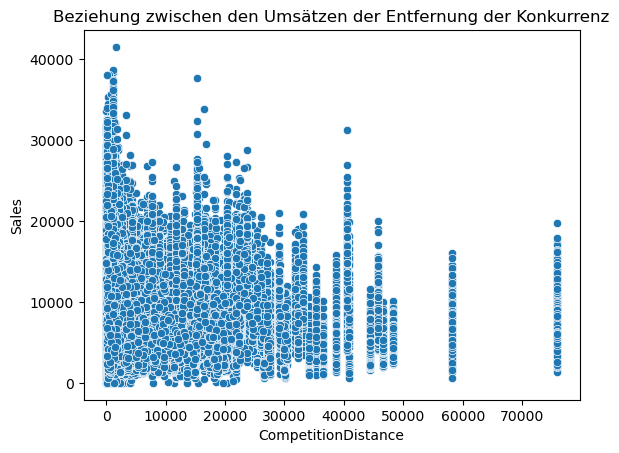

In [6]:
sns.scatterplot(x='CompetitionDistance', y='Sales', data=sales_stores_df).set(title="Beziehung zwischen den Umsätzen der Entfernung der Konkurrenz");

Ich erkenne hier keine eindeutige Beziehung. Ich sehe aber, dass die höchsten Gewinne in Filialen erzielt werden, in denen der Wettbewerb sehr eng ist. Intuitiv denke ich, dass diese Filialen an Orten liegen, die von vielen Menschen besucht werden, und dass die Konkurrenz dort Geschäfte hat, weil es attraktive Orte sind.

##### CompetitionOpenSince

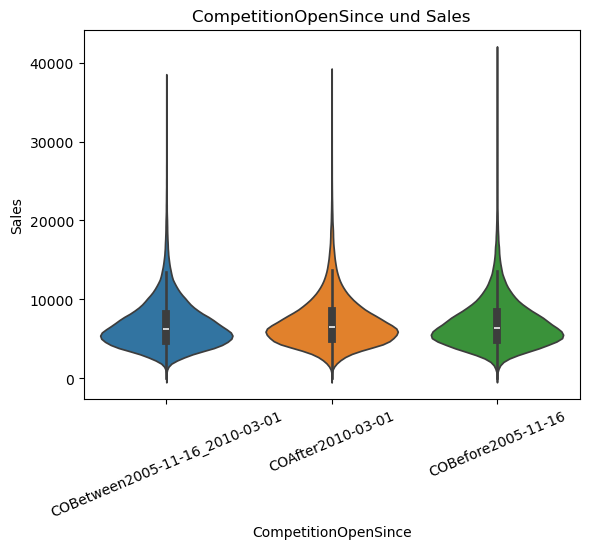

In [7]:
sns.violinplot(x='CompetitionOpenSince', y='Sales', data=sales_stores_df, hue='CompetitionOpenSince').set(title='CompetitionOpenSince und Sales')
plt.xticks(rotation = 23);

In [8]:
by_co_since = sales_stores_df.groupby('CompetitionOpenSince')
by_co_since['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
CompetitionOpenSince,,,,,,,,
COAfter2010-03-01,278197.0,7117.000708,3165.477853,0.0,5004.0,6515.0,8504.0,38722.0
COBefore2005-11-16,291327.0,6949.160517,3072.442867,0.0,4870.0,6371.0,8361.0,41551.0
COBetween2005-11-16_2010-03-01,274868.0,6798.806303,3066.670223,0.0,4715.0,6206.0,8210.0,38025.0


Ich kann keinen eindeutigen Zusammenhang zwischen der Dauer des Wettbewerbs und den Gewinnen erkennen.

##### Promo2

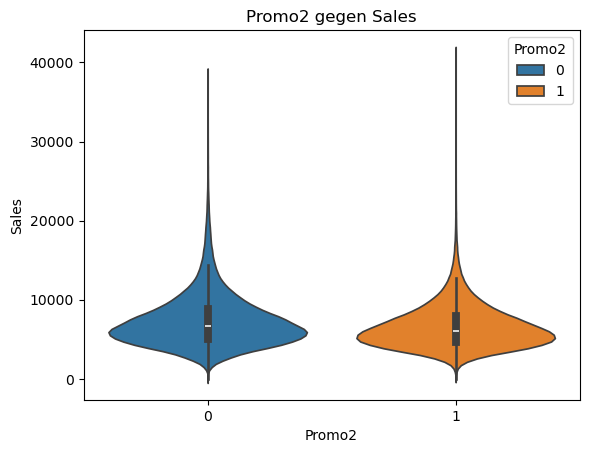

In [9]:
sns.violinplot(x='Promo2', y='Sales', data=sales_stores_df, hue='Promo2').set(title='Promo2 gegen Sales');

In [10]:
by_promo2 = sales_stores_df.groupby('Promo2')
by_promo2['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Promo2,,,,,,,,
0,423307.0,7350.557935,3394.270985,0.0,5090.0,6685.0,8821.0,38722.0
1,421085.0,6558.386062,2725.197952,0.0,4667.0,6075.0,7912.0,41551.0
